# Python Exploratory Data Analysis 

# Task

You are hired as part of a data analysis & science team at a fintech start up. The start up has offered loans of $£1,000$ to $1000$ customers in various groups of interest in order to collect data on their likelihood of repayment.  

Your role is to offer an account of what factors lead to loan default. And thereby advise the new company on its loan strategy. 

The company has collected the following data:

```
 "ID",         Customer ID
 "Income",     Annual Pre-Tax Income on-application
 "Term" ,      Short or Long Term (6mo or 12mo)
 "Balance",    Current Account Balance on-application
 "Debt" ,      Outstanding Debt on-application
 "Score",      Credit Score (from referencing agency)
 "Default"     Observed Default (True = Default, False = Settle
```

...and would like a technical report produced which characterises the data collected (quality) and offers analysis. 



# Part 1: Data Structure

### Q. Import pandas

In [26]:
import pandas as pd

### Q. Read in the loan data

In [27]:
df = pd.read_csv('loan_data.csv')
df.head(3)

,ID,Income,Term,Balance,Debt,Score,Default
0,567,17500.0,Short Term,1460.0,272.0,225.0,False
1,523,18500.0,Long Term,890.0,970.0,187.0,False
2,544,20700.0,Short Term,880.0,884.0,85.0,False


### Q. Show dataframe (/table) schema & structure

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       856 non-null    int64  
 1   Income   856 non-null    float64
 2   Term     856 non-null    object 
 3   Balance  856 non-null    float64
 4   Debt     856 non-null    float64
 5   Score    836 non-null    float64
 6   Default  856 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 41.1+ KB


### Q. Review and comment on structure

The dataframe has 7 columns and 856 rows. There is a mixture of data types: integer, float, string and boolean. The score column is missing 20 values. 

### Q. Use descriptive statistics to check data for initial quality and sense

In [29]:
df.describe(include = "all")

,ID,Income,Term,Balance,Debt,Score,Default
count,856.000000,856.000000,856,856.000000,856.000000,836.000000,856
unique,NaN,NaN,2,NaN,NaN,NaN,2
top,NaN,NaN,Short Term,NaN,NaN,NaN,False
freq,NaN,NaN,584,NaN,NaN,NaN,768
mean,496.807243,29882.009346,NaN,1214.334112,643.785047,450.922249,NaN
std,288.488814,13976.264882,NaN,587.764941,1150.286509,269.207175,NaN
min,1.000000,11800.000000,NaN,140.000000,0.000000,0.000000,NaN
25%,245.500000,19800.000000,NaN,910.000000,0.000000,242.750000,NaN
50%,494.500000,22900.000000,NaN,1120.000000,65.000000,376.500000,NaN
75%,747.250000,39025.000000,NaN,1370.000000,958.750000,647.250000,NaN


We can see from the Score column that 20 credit scores are missing from the data. All other data is present.

The Term column has 2 values, one being Short Term, as we would expect. 

The Default column has 2 values, one being False, as we would expect.

The columns with numerical data make sense at first glance. There aren't any values that look too small or large. 

For example, the average income of the dataset is 29882, minimum income is 11800 and maximum income is 86000, all of which are feasible. At least 25% of the customers have no debt. 

### Q. Report specifically on missing data

In [30]:
df.isna().any()

ID         False
Income     False
Term       False
Balance    False
Debt       False
Score       True
Default    False
dtype: bool

As we have seen above, there are null values in the Score column. Let's see how many:

In [31]:
df.isna().sum()

ID          0
Income      0
Term        0
Balance     0
Debt        0
Score      20
Default     0
dtype: int64

There are 20 null values in the Score column, which confirms what we saw earlier on. 

# Part 2: Data Preparation

### Q. Create a clean dataset without rows with missing values

In [32]:
df = df.dropna(axis=0)

Let's double check the dataframe schema to confirm that 20 rows have been removed leaving 836 rows.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 855
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       836 non-null    int64  
 1   Income   836 non-null    float64
 2   Term     836 non-null    object 
 3   Balance  836 non-null    float64
 4   Debt     836 non-null    float64
 5   Score    836 non-null    float64
 6   Default  836 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 46.5+ KB


### Q. Check that dropping rows hasnt biased the data

In [34]:
df.describe(include = "all")

,ID,Income,Term,Balance,Debt,Score,Default
count,836.000000,836.000000,836,836.000000,836.000000,836.000000,836
unique,NaN,NaN,2,NaN,NaN,NaN,2
top,NaN,NaN,Short Term,NaN,NaN,NaN,False
freq,NaN,NaN,568,NaN,NaN,NaN,750
mean,496.019139,29907.177033,NaN,1218.552632,648.198565,450.922249,NaN
std,288.661776,14020.786832,NaN,592.723693,1154.413733,269.207175,NaN
min,1.000000,11800.000000,NaN,140.000000,0.000000,0.000000,NaN
25%,245.500000,19775.000000,NaN,910.000000,0.000000,242.750000,NaN
50%,493.500000,22900.000000,NaN,1120.000000,71.000000,376.500000,NaN
75%,747.500000,39025.000000,NaN,1380.000000,966.250000,647.250000,NaN


The values in the describe table haven't changed much so there is no evidence that the data has been biased. We have only removed 20 rows from a dataset of 856 rows which is about 2% of data. It is unlikely removing that much data would introduce bias.

# Part 3: Exploratory Numerical Analysis

### Q. Review possible correlatons

In [35]:
df.corr()

,ID,Income,Balance,Debt,Score,Default
ID,1.000000,-0.067470,-0.006350,-0.040987,-0.063579,0.047707
Income,-0.067470,1.000000,0.628587,0.396679,0.775793,-0.078826
Balance,-0.006350,0.628587,1.000000,0.391799,0.423201,-0.027888
Debt,-0.040987,0.396679,0.391799,1.000000,-0.048554,0.335033
Score,-0.063579,0.775793,0.423201,-0.048554,1.000000,-0.264181
Default,0.047707,-0.078826,-0.027888,0.335033,-0.264181,1.000000


### Q. Interpret and characterise correlations

We're most interested in seeing which features of the dataset have an impact on the default status. Interestingly, the Default column doesn't have particularly strong positive or negative correlation with any other column. The strongest correlation is 0.33 with Debt. The strongest positive correlations are between Score and Income and Balance and Income. Intuitively that makes sense because someone with a higher income is likely to have a higher balance and higher credit score. 

### Q. Perform a factor analysis using `groupby`

Let's use group by to see which factors are most important in determining whether a customer defaulted on their loan. Chosen to use median as mean can be skewed by extreme values. 

In [36]:
dfa = df.groupby('Default')['Income'].median()
dfa

Default
False    22900.0
True     21550.0
Name: Income, dtype: float64

In [37]:
dfb = df.groupby('Default')['Balance'].median()
dfb

Default
False    1120.0
True     1130.0
Name: Balance, dtype: float64

In [38]:
dfc = df.groupby('Default')['Debt'].median()
dfc

Default
False       0.0
True     1560.5
Name: Debt, dtype: float64

In [39]:
dfd = df.groupby('Default')['Score'].median()
dfd

Default
False    400.5
True     192.0
Name: Score, dtype: float64

The median for Income and Balance were similiar for True and False suggesting they don't have much impact on whether the customer defaults. The median for Debt was 0 for False meaning that at least 50% of customers who didn't default had no debt. That makes intuitive sense because people with debt are less likely to keep up with repayments. Similiarly, the median credit score was much higher for customers who didn't default. A credit score takes into account whether you keep up with payments. Again it makes sense that customers who didn't default would have a higher credit score as there's evidence they keep up with payments.

# Part 4: Exploratory Visual Analysis

In [40]:
import seaborn as sns

### Q. Visualize the `Income` distribution

C:\Users\44784\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


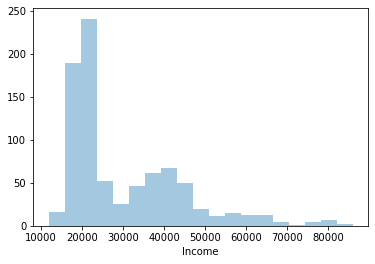

In [41]:
sns.distplot(df['Income'], kde=False);

C:\Users\44784\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


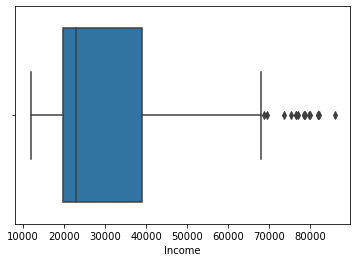

In [42]:
box = sns.boxplot(df['Income'])

### Q. Visualize Income relationships

There seemed to be positive correlation between Income and Score. Let's visualize using a scatterplot. 

<AxesSubplot:title={'center':'Income and Credit Score of Customers'}, xlabel='Income', ylabel='Score'>

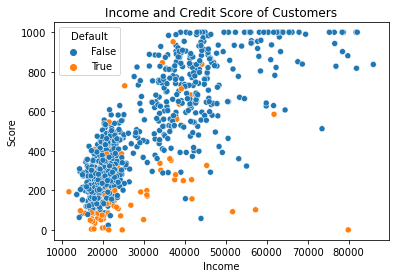

In [43]:
sc = sns.scatterplot(data=df, x='Income', y='Score', hue="Default")
sc.set(title = 'Income and Credit Score of Customers')
sc

The orange dots in the graph above are the people who defaulted. They tended to have a lower credit score but there were also multiple people with a high credit score who defaulted.

There seemed to be positive correlation between Income and Balance. Let's visualize using a scatterplot. 

<AxesSubplot:title={'center':'Income and Balance of Customers'}, xlabel='Income', ylabel='Balance'>

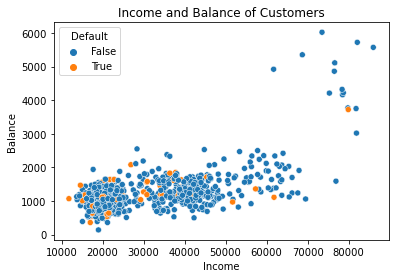

In [44]:
sc = sns.scatterplot(data=df, x='Income', y='Balance', hue="Default")
sc.set(title = 'Income and Balance of Customers')
sc

Income and Debt didn't seem to have strong correlation. How does that look on a scatterplot?

<AxesSubplot:title={'center':'Income and Debt of Customers'}, xlabel='Income', ylabel='Debt'>

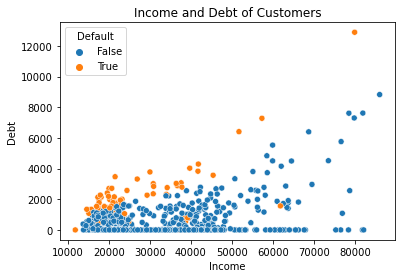

In [45]:
sc = sns.scatterplot(data=df, x='Income', y='Debt', hue="Default")
sc.set(title = 'Income and Debt of Customers')
sc

Although the graph above doesn't show a clear relationship between Income and Debt it does show that those with higher Debt were more likely to default (with a few exceptions).

### Q. Visualize `Default` relationships

From above the median credit score was higher for customers who didn't default. Using a violinplot to visualize the relationship:

[Text(0.5, 1.0, 'Credit Score of Customers by Default status')]

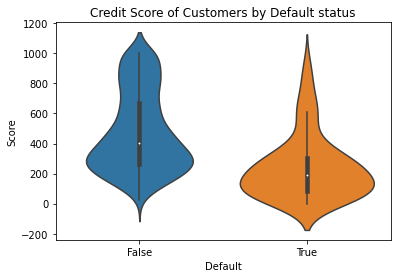

In [46]:
vi = sns.violinplot(data=df, x='Default', y='Score')
vi.set(title = 'Credit Score of Customers by Default status')

The violinplot shows that those with higher credit scores were less likely to default but there were still people with high credit scores who did default. A stripplot will show us the individual people more clearly. If there were fewer people with higher credit scores who defaulted the correlation between Score and Default may have been stronger.

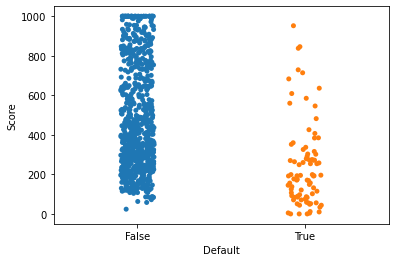

In [47]:
vi = sns.stripplot(x="Default", y="Score", data=df)

From above the median debt was lower for customers who didn't default. Use a box plot to visualise:

[Text(0.5, 1.0, 'Debt of Customers by Default')]

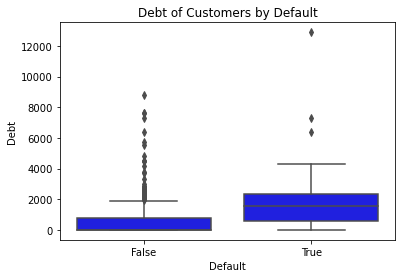

In [48]:
box = sns.boxplot(data = df, x='Default',y = 'Debt', color = "blue")
box.set(title = 'Debt of Customers by Default')

Those who defaulted tended to have more debt. However, there were still people with lots of debt who didn't default (they appear as outliers in the false boxplot). If there were fewer people with lots of debt who didn't default the correlation between debt and default may have been higher.

Default seemed to have no correlation with income. Visualize using a violin plot.

[Text(0.5, 1.0, 'Income of Customers by Default status')]

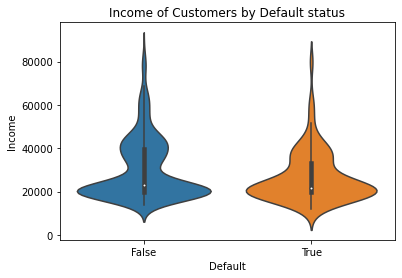

In [49]:
vi = sns.violinplot(data=df, x='Default', y='Income')
vi.set(title = 'Income of Customers by Default status')

As expected, the violin plot looks similiar for both True and False.

[Text(0.5, 1.0, 'Income of Customers by Balance status')]

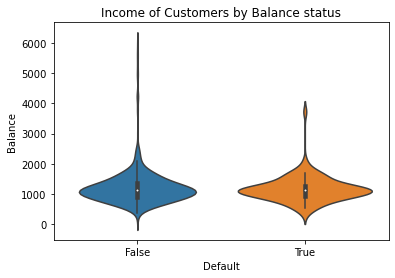

In [50]:
vi = sns.violinplot(data=df, x='Default', y='Balance')
vi.set(title = 'Income of Customers by Balance status')

As expected the violin plot looks similiar for true and false.

### Q. Extend the visual analysis to explore all columns

Let's visualize the relationship between Debt and Credit Score using a scatterplot. From above the correlation isn't very strong.

<AxesSubplot:title={'center':'Credit Score and Debt of Customers'}, xlabel='Score', ylabel='Debt'>

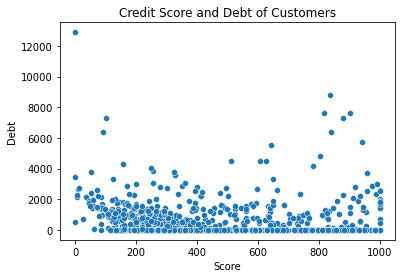

In [51]:
sc = sns.scatterplot(data=df, x='Score', y='Debt')
sc.set(title = 'Credit Score and Debt of Customers')
sc

Let's visualize the relationship between Balance and Credit Score using a scatterplot. From above the correlation isn't very strong.

<AxesSubplot:title={'center':'Balance and Debt of Customers'}, xlabel='Score', ylabel='Balance'>

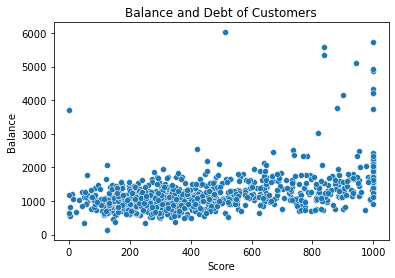

In [52]:
sc = sns.scatterplot(data=df, x='Score', y='Balance')
sc.set(title = 'Balance and Debt of Customers')
sc

# Part 5: Conclusion

From exploratory data analysis of the dataset we can conclude the two features that have most impact on Default status are Debt and Score. However, the correlation between Default/Debt and Default/Score aren't particularly strong because in both cases there are outliers. For example, people with higher debt were more likely to default but there were also many people with high debt who didn't default. Similiarly, people with a higher credit score were less likely to default. However, there were still many people with a high credit score who did default. Income and Balance didn't seem to have much impact on Default status. 

# Part 6: Stretch

### Q. Export this document as a report and produce a word version

In [53]:
!pip install pandoc

In [54]:
!pandoc DS_Project_LoanRisk_2.ipynb -s -o projectloanrisk.docx 